Found 25000 files belonging to 5 classes.
Using 20000 files for training.
Found 25000 files belonging to 5 classes.
Using 5000 files for validation.
Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 288ms/step - accuracy: 0.6694 - loss: 0.8419 - val_accuracy: 0.9398 - val_loss: 0.1683
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 279ms/step - accuracy: 0.9415 - loss: 0.1732 - val_accuracy: 0.8790 - val_loss: 0.3989
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 279ms/step - accuracy: 0.9699 - loss: 0.1040 - val_accuracy: 0.9706 - val_loss: 0.0875
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 203s 325ms/step - accuracy: 0.9867 - loss: 0.0453 - val_accuracy: 0.9718 - val_loss: 0.0869
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 174s 278ms/step - accuracy: 0.9885 - loss: 0.0413 - val_accuracy: 0.9828 - val_loss: 0.0487
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 277ms/step - accuracy: 0.9963 - loss: 0.0136 - val_accuracy: 0.9610 - val_loss: 0.1468
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 176s 282ms/step - a

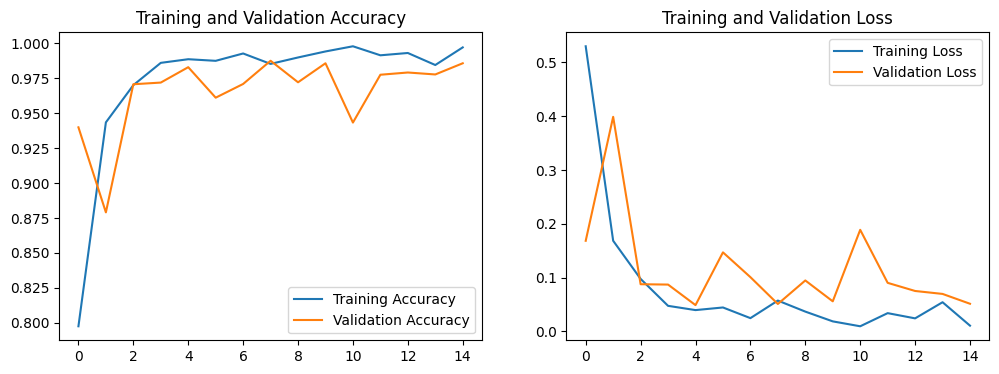

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# Path to your dataset
DATASET_PATH = r"C:\Users\kashi\Desktop\LY Project\Multi Cancer\Multi Cancer\Cervical Cancer"

# Parameters
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42

# Load dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = val_ds.class_names
num_classes = len(class_names)

# Normalize pixel values
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Build CNN model
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15
)

# Plotting training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_history(history)

# Classification Report + ROC
print("\n📋 Classification Report:")
y_true = []
y_pred = []
y_score = []

for images, labels in val_ds:
    probs = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(probs, axis=1))
    y_score.extend(probs)

print(classification_report(y_true, y_pred, target_names=class_names))

# Accuracy Score
print(f"\n✅ Accuracy Score: {accuracy_score(y_true, y_pred):.3f}")

# ROC-AUC Score
try:
    y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))
    y_score = np.array(y_score)
    roc_auc = roc_auc_score(y_true_bin, y_score, multi_class='ovr')
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    # Plot ROC Curve
    fpr = dict()
    tpr = dict()
    roc_auc_individual = dict()

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_score[:, i])
        roc_auc_individual[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(10, 6))
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc_individual[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Multi-Class')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

except Exception as e:
    print("Could not compute AUC:", e)

